In [48]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.style.use('default')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    'font.size': 20
})

In [49]:
data1step = jnp.load('../onestep/data.npy',allow_pickle = True).item()
data2step = jnp.load('../twostep/data.npy',allow_pickle = True).item()
dataPINNSR = jnp.load('../PINNSR/data.npy',allow_pickle = True).item()

In [50]:
# grids
tx_obs = data1step['tx_obs']
tx_all = data1step['tx_all']
tx_int = data1step['tx_int']
tx_bdy = data1step['tx_bdy']
tx_fine = data1step['tx_fine']
xfine = data1step['xfine']
# u vals at fine grid
u_true = data1step['u_true']
# u vals at fine grid at IC
u_true_IC = data1step['u_true_IC']
# u vals at fine grid at IC
u_true_FC = data1step['u_true_FC']

# 1step preds
u_pred_1step = data1step['u_pred']
# 2step preds
u_pred_2step = data2step['u_pred']
# 2step preds
u_pred_PINNSR = dataPINNSR['u_pred']

## Filtering

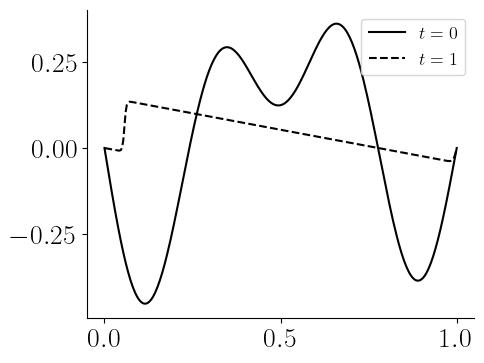

In [51]:
# u_true IC and FC plot
plt.figure(figsize=(5,4))
# Plot IC
plt.plot(xfine, u_true_IC,
         color = 'black',
         label = r'$t=0$')
# Plot FC
plt.plot(xfine,u_true_FC,
         linestyle = '--',
         color = 'black',
         label = r'$t=1$')

# fig settings
plt.locator_params(axis="x", nbins=4)
plt.locator_params(axis="y", nbins=4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc="upper right",fontsize = 13)
#save fig
plt.savefig('initial_final_conds.pdf', 
            bbox_inches='tight',
            format = 'pdf',
            dpi=300)

In [59]:
# vmin and vmax to use same colors
u_stacked = jnp.stack([u_true, 
                       u_pred_1step, 
                       u_pred_2step, 
                       u_pred_PINNSR])
vmin, vmax = jnp.min(u_stacked), jnp.max(u_stacked)

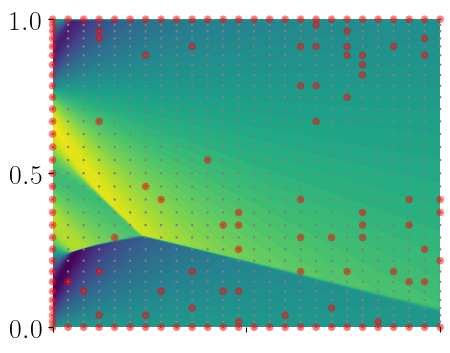

In [63]:
# u_true plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_true,
                levels= 70, 
                vmin=vmin,
                vmax=vmax)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 30, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([])
plt.gca().set_xticklabels([]) 
# save fig
plt.savefig('shock_u_data.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

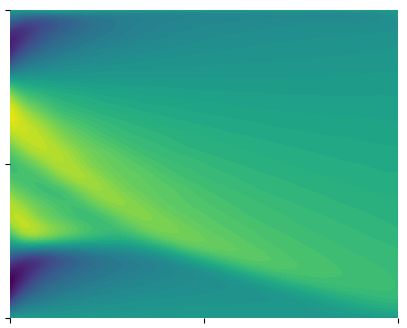

In [62]:
# u_pred 1step plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_pred_1step,
                levels= 70, 
                vmin=vmin,
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.savefig('shock_u_pred_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

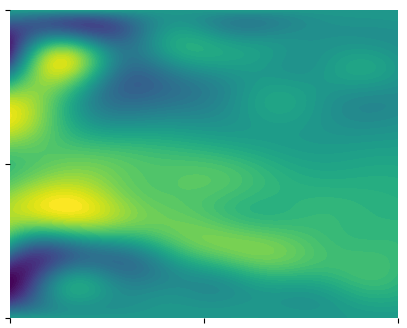

In [64]:
# u_pred 2step plot
plt.figure(figsize=(5,4))
plt.tricontourf(*tx_fine.T, u_pred_2step,
                levels= 70, 
                vmin=vmin,
                vmax=vmax)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([]) 
plt.gca().set_yticklabels([])
plt.savefig('shock_u_pred_2step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

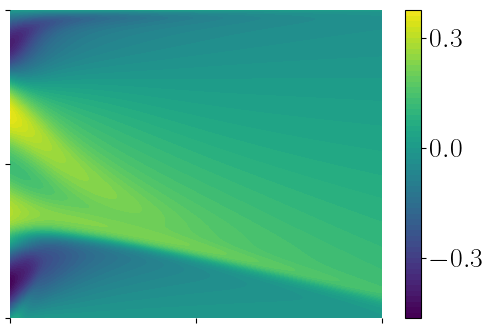

In [55]:
# u_pred PINNSR plot
plt.figure(figsize=(6,4))
cp = plt.tricontourf(*tx_fine.T,
                     u_pred_PINNSR,
                     levels = 70,
                     vmin= -0.453787655164269, 
                     vmax= 0.3887784971499098)
cb = plt.colorbar(cp)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([]) 
plt.savefig('shock_u_pred_PINNSR.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            )

### Errors

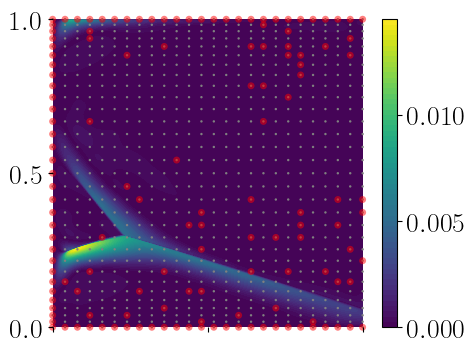

In [56]:
# u errors 1step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_1step)/jnp.linalg.norm(u_true),
                levels= 70)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([])
# save fig
plt.savefig('shock_u_error_1step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            ) 

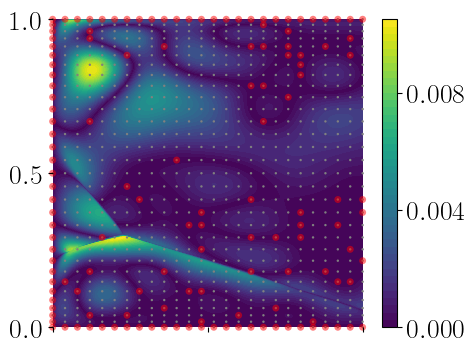

In [57]:
# u errors 2 step plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_2step)/jnp.linalg.norm(u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([])
# save fig
plt.savefig('shock_u_error_2step.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            ) 

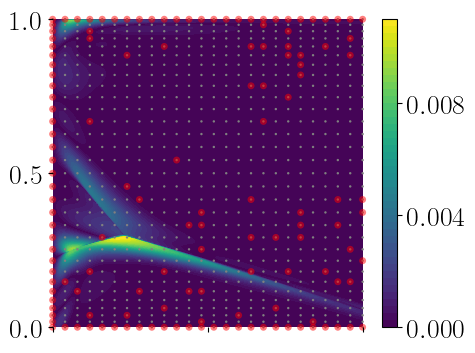

In [58]:
# u errors PINNSR plot
plt.figure(figsize=(5,4))
cp = plt.tricontourf(*tx_fine.T, jnp.abs(u_true - u_pred_PINNSR)/jnp.linalg.norm(u_true),
                levels= 50)
# coll grid
plt.scatter(*tx_all.T,
            c='gray',
            s = 3,
            clip_on =False, 
            edgecolors = 'none')
# obs grid
plt.scatter(*tx_obs.T,
            c='red', 
            s = 25, 
            alpha = 0.5,
            clip_on =False,
            edgecolors = 'none')

# colorbar
cb = plt.colorbar(cp)

# fig settings
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.locator_params(nbins=3)
tick_locator = ticker.MaxNLocator(nbins=3)
cb.locator = tick_locator
cb.update_ticks()
plt.gca().set_xticklabels([])
# save fig
plt.savefig('shock_u_error_PINNSR.pdf',
            dpi=300,
            bbox_inches='tight',
            format ="pdf"
            ) 